# <center> **NLP analysis of jokes dataset**

## Table of Contents

1. **[RNN models](#5)**
	* [Pretrained embedding (word2vec)](#sub-heading)
     + [Dataset loader](#sub-sub-heading-1) 
     + [Split](#sub-sub-heading-2)
     + [RNN](#sub-sub-heading-2)
     + [LSTM](#sub-sub-heading-2)
     + [Bidirectional LSTM](#sub-sub-heading-2)
     + [GRU](#sub-sub-heading-2)
	* [Glove Embedding](#sub-heading)
     + [Dataset loader](#sub-sub-heading-1) 
     + [Split](#sub-sub-heading-2)
     + [RNN](#sub-sub-heading-2)
     + [LSTM](#sub-sub-heading-2)
     + [Bidirectional LSTM](#sub-sub-heading-2)
	* [Make own vocab by train word2vec model](#sub-heading)
     + [Dataset loader](#sub-sub-heading-1) 
     + [Split](#sub-sub-heading-2)
     + [LSTM](#sub-sub-heading-2)




In [ ]:
!pip install unidecode
!pip install emoji
!pip install word2number
!pip install contractions
!pip3 install spacy
!python3 -m spacy download en_core_web_sm
!python3 -m nltk.downloader stopwords
!pip install pyspellchecker
!pip install iplot

     |████████████████████████████████| 12.0 MB 38.9 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 
import warnings
warnings.simplefilter('ignore')

from scipy.stats import norm

from google.colab import drive
import os
import string
import emoji

import plotly as py
import numpy as np
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Contours, Histogram2dContour, Marker, Scatter

import unidecode
from word2number import w2n
import contractions
from bs4 import BeautifulSoup
import spacy

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from spellchecker import SpellChecker
from wordcloud import WordCloud

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas(desc='PROGRESS>>>')

from google_drive_downloader import GoogleDriveDownloader as gdd
from IPython.core.display import display, HTML

from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, StratifiedKFold, KFold, cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import label_binarize, StandardScaler

from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm import tqdm
import gensim
import gensim.downloader as api
from gensim.models import Word2Vec

import gensim.downloader as gensim_api
from torch.nn.utils.rnn import pad_sequence

from functools import partial
import torch   
# from torchtext import data    
import torch.nn as nn
from torch.utils.data import TensorDataset, ConcatDataset, DataLoader, random_split, Dataset
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import torch.optim as optim

import re
import gc
import os

import fileinput
import string
import tensorflow as tf
import zipfile
import datetime
import sys
from tqdm  import tqdm
tqdm.pandas()
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, GlobalMaxPooling1D, Bidirectional, GRU
from keras.layers.embeddings import Embedding
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read data: 

In [ ]:
# data_train = pd.read_csv('/content/drive/My Drive/NLP_humor/train_val_test/jokes_TRAIN.csv', 
#                  sep=',', 
#                  encoding='utf-8')

# data_val = pd.read_csv('/content/drive/My Drive/NLP_humor/train_val_test/jokes_VAL.csv', 
#                  sep=',', 
#                  encoding='utf-8')

# data_test = pd.read_csv('/content/drive/My Drive/NLP_humor/train_val_test/jokes_TEST.csv', 
#                  sep=',', 
#                  encoding='utf-8')


# data_train = pd.read_csv('/content/drive/My Drive/NLP_humor/train_val_test/aug/aug_jokes_TITLE_TRAIN.csv', 
#                  sep=',', 
#                  encoding='utf-8')

# data_val = pd.read_csv('/content/drive/My Drive/NLP_humor/train_val_test/aug/aug_jokes_TITLE_VAL.csv', 
#                  sep=',', 
#                  encoding='utf-8')

# data_test = pd.read_csv('/content/drive/My Drive/NLP_humor/train_val_test/aug/aug_jokes_TITLE_TEST.csv', 
#                  sep=',', 
#                  encoding='utf-8')


data_train = pd.read_csv('/content/drive/My Drive/NLP_humor/train_val_test/just_title/jokes_TRAIN_TITLE.csv', 
                 sep=',', 
                 encoding='utf-8')

data_val = pd.read_csv('/content/drive/My Drive/NLP_humor/train_val_test/just_title/jokes_VAL_TITLE.csv', 
                 sep=',', 
                 encoding='utf-8')

data_test = pd.read_csv('/content/drive/My Drive/NLP_humor/train_val_test/just_title/jokes_TEST_TITLE.csv', 
                 sep=',', 
                 encoding='utf-8')


In [ ]:
data_train.dropna(inplace=True)
data_val.dropna(inplace=True)
data_test.dropna(inplace=True)

In [ ]:
data_train.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data_val.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data_test.drop('id', axis=1, inplace=True)

# **Concat**

In [ ]:
data = pd.concat([data_train.assign(indic="train"), data_val.assign(indic="val"), data_test.assign(indic="test")])

In [ ]:
data.head()

,joke,rank,indic
0,Jennifer Aniston's dance scenes as a stripper ...,0.0,train
1,How many pro choicers do you need to change a ...,0.0,train
2,Something went wrong .. ha ha,3.0,train
3,the 'winning' blonde,1.0,train
5,One time there was an Irishman who got so drunk,3.0,train


In [ ]:
data.isna().sum()

joke     0
rank     0
indic    0
dtype: int64

In [ ]:
from collections import Counter
token_counts = Counter()
# Count how many times does each token occur in both "Title" and "FullDescription" in total

for line in data['joke'].values:
    token_counts.update(line.split(" "))

In [ ]:
print("Total unique tokens :", len(token_counts))
print('\n'.join(map(str, token_counts.most_common(n=5))))
print('...')
print('\n'.join(map(str, token_counts.most_common()[-3:])))

assert token_counts.most_common(1)[0][1] in  range(116000, 117000)
assert len(token_counts) in range(107000, 107100)
print('Correct!')

In [ ]:
min_count = 10

# tokens from token_counts keys that had at least min_count occurrences throughout the dataset
tokens = sorted(t for t, c in token_counts.items() if c >= min_count)

# Add a special tokens for unknown and empty words
UNK, PAD = "UNK", "PAD"
tokens = [UNK, PAD] + tokens

In [ ]:
print("Vocabulary size:", len(tokens))

Vocabulary size: 9240


In [ ]:
data['rank'] = data['rank'].astype(int)

# **LSTM -  multiclass classification**

In [ ]:
one_hot = pd.get_dummies(data["rank"])
data.drop(['rank'],axis=1,inplace=True)
data = pd.concat([data,one_hot],axis=1)
data.head()

,joke,indic,0,1,2,3,4
0,Jennifer Aniston's dance scenes as a stripper ...,train,1,0,0,0,0
1,How many pro choicers do you need to change a ...,train,1,0,0,0,0
2,Something went wrong .. ha ha,train,0,0,0,1,0
3,the 'winning' blonde,train,0,1,0,0,0
5,One time there was an Irishman who got so drunk,train,0,0,0,1,0


In [ ]:
seq_len = data.applymap(lambda t: len(str(t).split()))

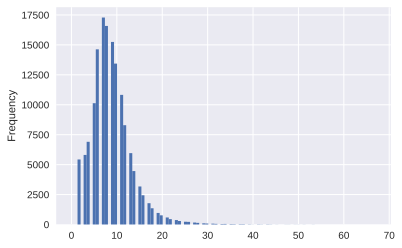

In [ ]:
seq_len['joke'].plot.hist(bins=100)

In [ ]:
(seq_len <= 20).all(axis=1).sum() / len(seq_len)

0.9789992867428371

# **Split**

In [ ]:
data_train, data_val, data_test = data[data["indic"].eq("train")], data[data["indic"].eq("val")], data[data["indic"].eq("test")]

In [ ]:
data_train.drop(['indic'], axis=1, inplace=True)
data_val.drop(['indic'], axis=1, inplace=True)
data_test.drop(['indic'], axis=1, inplace=True)

In [ ]:
X_train  = data_train[["joke"]]
y_train = data_train.drop(['joke'],axis=1).values

In [ ]:
X_val = data_val[["joke"]]
y_val  = data_val.drop(['joke'],axis=1).values

In [ ]:
X_test = data_test[["joke"]]
y_test = data_test.drop(['joke'],axis=1).values

In [ ]:
vocabulary_size =  9240
tokenizer = Tokenizer(num_words= vocabulary_size)

df = pd.concat([X_train, X_val]).values.ravel()

tokenizer.fit_on_texts(df)

sequences = tokenizer.texts_to_sequences(X_train.values.ravel())
X_train = pad_sequences(sequences, maxlen=20)

In [ ]:
sequences = tokenizer.texts_to_sequences(X_val.values.ravel())
X_val = pad_sequences(sequences, maxlen=20)

In [ ]:
sequences = tokenizer.texts_to_sequences(X_test.values.ravel())
X_test = pad_sequences(sequences, maxlen=20)

In [ ]:

# model = models.Sequential()
# model.add(Embedding(len(tokens), 256, input_length=84072 ))
# model.add(layers.Conv1D(128, (3, 3), activation='sigmoid'))
# model.add(layers.GlobalMaxPooling1D(128))
# model.add(layers.Flatten())
# model.add(layers.Dense(50, activation='sigmoid'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(5, activation='softmax'))
# # Compile model
# model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# print(model.summary())
# history = model.fit(data_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

##########################

# n_most_common_words = 8000
# max_len = 130
# tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
# tokenizer.fit_on_texts(concated['TITLE'].values)
# sequences = tokenizer.texts_to_sequences(concated['TITLE'].values)
# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

# X = pad_sequences(sequences, maxlen=max_len)

In [ ]:
# # # V 1 ## 
# model = Sequential()
# model.add(Embedding(9240, 128, input_length=20))
# model.add(Conv1D(64, 3, activation='sigmoid'))
# model.add(GlobalMaxPooling1D()) 
# model.add(Dense(50, activation='sigmoid'))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation='softmax'))

In [ ]:
# # V 1 ## 
model = Sequential()
model.add(Embedding(9240, 64, input_length=20))
model.add(Conv1D(64, 3, activation='sigmoid'))
model.add(GlobalMaxPooling1D()) 
model.add(Dense(50, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [ ]:
# # V 2 ## 
# model = Sequential()
# model.add(Embedding(9240, 64, input_length=20))
# model.add(Bidirectional(GRU(64, return_sequences = True), merge_mode='concat'))
# model.add(GlobalMaxPooling1D()) 
# # model.add(Dense(50, activation='sigmoid'))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation='softmax'))

In [ ]:
model = Sequential()
model.add(Embedding(20000, 16, input_length=20))
# model.add(Conv1D(32, 3, activation='sigmoid'))
# model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(16))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [ ]:
# model = Sequential()
# model.add(Embedding(9240, 16, input_length=20))
# # model.add(Dropout(0.2))
# # model.add(Conv1D(64, 5, activation='relu'))
# # model.add(MaxPooling1D(pool_size=2))
# model.add(LSTM(16))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation='softmax'))

In [ ]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.compile(loss='mse', optimizer='adam', metrics=['accuracy']) # mse

In [ ]:
history_2 = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_val, y_val),
                    shuffle = True
                    )

Epoch 1/30
941/941 [==============================] - 14s 10ms/step - loss: 0.1497 - accuracy: 0.3591 - val_loss: 0.1473 - val_accuracy: 0.3736
Epoch 2/30
941/941 [==============================] - 9s 9ms/step - loss: 0.1464 - accuracy: 0.3805 - val_loss: 0.1469 - val_accuracy: 0.3772
Epoch 3/30
941/941 [==============================] - 8s 9ms/step - loss: 0.1442 - accuracy: 0.3954 - val_loss: 0.1472 - val_accuracy: 0.3727
Epoch 4/30
941/941 [==============================] - 9s 9ms/step - loss: 0.1423 - accuracy: 0.4087 - val_loss: 0.1481 - val_accuracy: 0.3659
Epoch 5/30
941/941 [==============================] - 9s 9ms/step - loss: 0.1405 - accuracy: 0.4225 - val_loss: 0.1496 - val_accuracy: 0.3624
Epoch 6/30
941/941 [==============================] - 9s 9ms/step - loss: 0.1390 - accuracy: 0.4325 - val_loss: 0.1502 - val_accuracy: 0.3598
Epoch 7/30
941/941 [==============================] - 9s 9ms/step - loss: 0.1376 - accuracy: 0.4402 - val_loss: 0.1517 - val_accuracy: 0.3592
Epoc

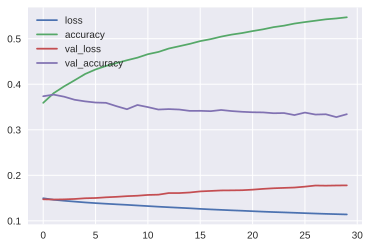

In [ ]:
pd.DataFrame(history_2.history).plot()

In [ ]:
score = model.evaluate(X_test, y_test,
                       batch_size=128, verbose=1)
print('Test accuracy:', score[1])

preds = model.predict(X_test)

print(classification_report(np.argmax(y_test,axis=1),np.argmax(preds,axis=1)))

117/117 [==============================] - 1s 4ms/step - loss: 0.1750 - accuracy: 0.3353
Test accuracy: 0.3352535367012024
              precision    recall  f1-score   support

           0       0.41      0.61      0.49      5441
           1       0.11      0.01      0.02      1726
           2       0.23      0.18      0.20      3347
           3       0.27      0.29      0.28      3512
           4       0.17      0.05      0.08       903

    accuracy                           0.34     14929
   macro avg       0.24      0.23      0.22     14929
weighted avg       0.29      0.34      0.30     14929



In [ ]:
history_1 = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_val, y_val),
                    shuffle = True
                    )

Epoch 1/30
941/941 [==============================] - 13s 11ms/step - loss: 1.4781 - accuracy: 0.3602 - val_loss: 1.4522 - val_accuracy: 0.3686
Epoch 2/30
941/941 [==============================] - 10s 11ms/step - loss: 1.4455 - accuracy: 0.3699 - val_loss: 1.4454 - val_accuracy: 0.3766
Epoch 3/30
941/941 [==============================] - 8s 9ms/step - loss: 1.4275 - accuracy: 0.3808 - val_loss: 1.4427 - val_accuracy: 0.3722
Epoch 4/30
941/941 [==============================] - 8s 9ms/step - loss: 1.4130 - accuracy: 0.3876 - val_loss: 1.4440 - val_accuracy: 0.3734
Epoch 5/30
941/941 [==============================] - 8s 9ms/step - loss: 1.3999 - accuracy: 0.3945 - val_loss: 1.4458 - val_accuracy: 0.3713
Epoch 6/30
941/941 [==============================] - 9s 9ms/step - loss: 1.3896 - accuracy: 0.4001 - val_loss: 1.4500 - val_accuracy: 0.3719
Epoch 7/30
941/941 [==============================] - 8s 9ms/step - loss: 1.3805 - accuracy: 0.4068 - val_loss: 1.4536 - val_accuracy: 0.3637
Ep

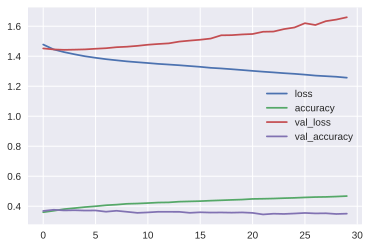

In [ ]:
pd.DataFrame(history_1.history).plot()

Pred

In [ ]:
score = model.evaluate(X_test, y_test,
                       batch_size=128, verbose=1)
print('Test accuracy:', score[1])

117/117 [==============================] - 1s 5ms/step - loss: 1.6453 - accuracy: 0.3491
Test accuracy: 0.34905219078063965


In [ ]:
preds = model.predict(X_test)

In [ ]:
print(classification_report(np.argmax(y_test,axis=1),np.argmax(preds,axis=1)))

              precision    recall  f1-score   support

           0       0.40      0.70      0.51      5441
           1       0.00      0.00      0.00      1726
           2       0.24      0.12      0.16      3347
           3       0.27      0.28      0.27      3512
           4       0.17      0.05      0.08       903

    accuracy                           0.35     14929
   macro avg       0.22      0.23      0.20     14929
weighted avg       0.27      0.35      0.29     14929



In [ ]:
## V 1 ## 
model = Sequential()
model.add(Embedding(28000, 256, input_length=400))  # 20
model.add(Conv1D(128, 3, activation='sigmoid'))
model.add(GlobalMaxPooling1D()) 
model.add(Dense(50, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [ ]:
history_2 = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_val, y_val),
                    )

In [ ]:
pd.DataFrame(history_2.history).plot()

In [ ]:
score = model.evaluate(X_test, y_test,
                       batch_size=128, verbose=1)
print('Test accuracy:', score[1])

In [ ]:
preds = model.predict(X_test)
print(classification_report(np.argmax(y_test,axis=1),np.argmax(preds,axis=1)))

In [ ]:
score = model.evaluate(X_test, y_test,
                       batch_size=256, verbose=1)
print('Test accuracy:', score[1])

151/151 [==============================] - 2s 9ms/step - loss: 4.0153 - accuracy: 0.3049
Test accuracy: 0.304904043674469


In [ ]:
preds = model.predict(X_test)

In [ ]:
print(classification_report(np.argmax(y_test,axis=1),np.argmax(preds,axis=1)))

              precision    recall  f1-score   support

           0       0.43      0.42      0.42     12104
           1       0.11      0.11      0.11      3846
           2       0.24      0.26      0.25      8162
           3       0.21      0.18      0.19      6762
           4       0.36      0.40      0.38      7584

    accuracy                           0.31     38458
   macro avg       0.27      0.27      0.27     38458
weighted avg       0.31      0.31      0.31     38458

